## 6.5.1 Best Subset Selection

Best Subset Selection에서는 $p$개의 예측변수 각각의 가능한 조합에 대해 <br> 
별도의 least square regression을 fitting

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from itertools import chain, combinations
import statsmodels.api as sm

pd.set_option('precision', 2) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
hitters = pd.read_csv('datasets/Hitters.csv', index_col=0).dropna()

In [3]:
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,...,W,632,43,10,475.00,N
-Alvin Davis,479,130,18,66,72,76,...,W,880,82,14,480.00,A
-Andre Dawson,496,141,20,65,78,37,...,E,200,11,3,500.00,N
-Andres Galarraga,321,87,10,39,42,30,...,E,805,40,4,91.50,N
-Alfredo Griffin,594,169,4,74,51,35,...,W,282,421,25,750.00,A
-Al Newman,185,37,1,23,8,21,...,E,76,127,7,70.00,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Wally Joyner,593,172,22,82,100,57,...,W,1222,139,15,165.00,A
-Willie McGee,497,127,7,65,48,37,...,E,325,9,3,700.00,N
-Willie Randolph,492,136,5,76,50,94,...,E,313,381,20,875.00,A


In [4]:
hitters.index.name = 'Player'

hitters = hitters.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,18]] # push salary at the end
hitters['League'] = pd.get_dummies(hitters['League']).iloc[:, 0]
hitters['Division'] = pd.get_dummies(hitters['Division']).iloc[:, 0]
hitters['NewLeague'] = pd.get_dummies(hitters['NewLeague']).iloc[:, 0]

In [5]:
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,...,Division,PutOuts,Assists,Errors,NewLeague,Salary
Player,,,,,,,,,,,,,
-Alan Ashby,315,81,7,24,38,39,...,0,632,43,10,0,475.00
-Alvin Davis,479,130,18,66,72,76,...,0,880,82,14,1,480.00
-Andre Dawson,496,141,20,65,78,37,...,1,200,11,3,0,500.00
-Andres Galarraga,321,87,10,39,42,30,...,1,805,40,4,0,91.50
-Alfredo Griffin,594,169,4,74,51,35,...,0,282,421,25,1,750.00
-Al Newman,185,37,1,23,8,21,...,1,76,127,7,1,70.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
-Wally Joyner,593,172,22,82,100,57,...,0,1222,139,15,1,165.00
-Willie McGee,497,127,7,65,48,37,...,1,325,9,3,0,700.00


In [6]:
X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

In [ ]:
k_features = 1

sub = []
reg = []
kft = []

n_features = X.shape[1]

for k_features in range(1, 20):
    subsets = chain(combinations(range(n_features), k_features)) #연결&콤비네이션

    best_score = np.inf

    for subset in subsets:
        lin_reg = sm.OLS(y, sm.add_constant(X.iloc[:, list(subset)])).fit()
        score = lin_reg.ssr
        if score < best_score:
            best_score, best_subset = score, list(subset)
            best_reg = lin_reg

    sub.append(best_subset)
    reg.append(best_reg)
    kft.append(k_features)

results = pd.DataFrame({'kft': kft, 'sub': sub, 'reg': reg},
                       columns = ['sub', 'reg', 'kft']).set_index('kft')

너무 오래걸린다. 두시간 넘게 해도 안돼서 포기...

In [ ]:
results = pd.read_pickle('results_651')

In [ ]:
#Choosing the Optimal Model
plt.figure(figsize=(16,12))

plt.subplot(2, 2, 1)
results.rss.plot(title='RSS', lw=1, color='blue')

plt.subplot(2, 2, 2)
max_r2a = results.r2a.argmax()-1
results.r2a.plot(title='Adj. $R^2$', markevery=[max_r2a], marker='D', lw=1, color='red')

plt.subplot(2, 2, 3)
min_aic = results.aic.argmin()-1
results.aic.plot(title='AIC', markevery=[min_aic], marker='D', lw=1, color='green')

plt.subplot(2, 2, 4)
min_bic = results.bic.argmin()-1
results.bic.plot(title='BIC', markevery=[min_bic], marker='D', lw=1, color='purple');

In [ ]:
bic_reg = sm.OLS(y, sm.add_constant(X.iloc[:, [0, 1, 5, 11, 14, 15]])).fit()
bic_reg.summary()

## 6.5.2 Forward and Backward Stepwise Selection

In [7]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = regr.ssr
    return {'model': regr, 'RSS': RSS}

In [8]:
def forward(predictors): #예측변수를 포함하지 않는 모델에서 시작

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
      
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [9]:
def backward(predictors): #예측변수를 다 포함하는 모델에서 시작
    
    results = []
    
    for combo in combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['RSS'].argmin()]

    return best_model

In [10]:
#forward selection
models2 = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1):    
    models2.loc[i] = forward(predictors)
    predictors = models2.loc[i]['model'].model.exog_names

bic_f = []

for m in models2.model:
    bic_f.append(m.bic)
    
np.array(bic_f).argmin()

C:\Users\dbdms\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  from ipykernel import kernelapp as app


5

In [11]:
#backward selection
models3 = pd.DataFrame(columns=['RSS', 'model'], index = range(1, len(X.columns)))

predictors = X.columns

while(len(predictors) > 1):  
    models3.loc[len(predictors)-1] = backward(predictors)
    predictors = models3.loc[len(predictors)-1]['model'].model.exog_names
    
bic_b = []

for m in models3.model:
    bic_b.append(m.bic)
    
np.array(bic_b).argmin()

C:\Users\dbdms\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  if sys.path[0] == '':


7

## 6.5.3 Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=3)

In [14]:
def processSubset(feature_set, X_train, y_train, X_test, y_test):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_test[list(feature_set)]) - y_test) ** 2).sum()
    return {'model':regr, 'RSS':RSS}

In [15]:
def forward(predictors, X_train, y_train, X_test, y_test):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p], X_train, y_train, X_test, y_test))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [16]:
models_train = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,len(X.columns)+1):    
    models_train.loc[i] = forward(predictors, X_train, y_train, X_test, y_test)
    predictors = models_train.loc[i]['model'].model.exog_names

C:\Users\dbdms\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  from ipykernel import kernelapp as app


C:\Users\dbdms\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  after removing the cwd from sys.path.


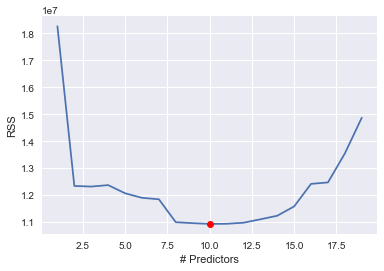

In [17]:
plt.plot(models_train['RSS'])
plt.xlabel('# Predictors')
plt.ylabel('RSS')
plt.plot(models_train['RSS'].argmin(), models_train['RSS'].min(), 'or');

In [18]:
models_full = pd.DataFrame(columns=['RSS', 'model'])

predictors = []

for i in range(1,20):    
    models_full.loc[i] = forward(predictors, X, y, X, y)
    predictors = models_full.loc[i]['model'].model.exog_names

C:\Users\dbdms\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  from ipykernel import kernelapp as app


In [19]:
print(models_train.loc[10, 'model'].model.exog_names)
print(models_full.loc[10, 'model'].model.exog_names)

['CRuns', 'PutOuts', 'CWalks', 'Runs', 'CRBI', 'League', 'AtBat', 'Hits', 'Division', 'Assists']
['Hits', 'CRBI', 'PutOuts', 'AtBat', 'Division', 'Walks', 'CWalks', 'CRuns', 'CAtBat', 'Assists']
